In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

# Original Source of data: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

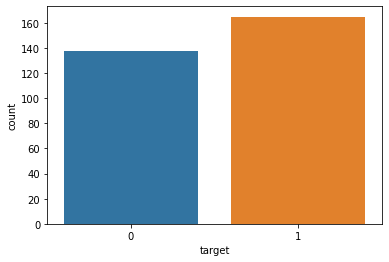

In [6]:
sns.countplot(x='target',data=df)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

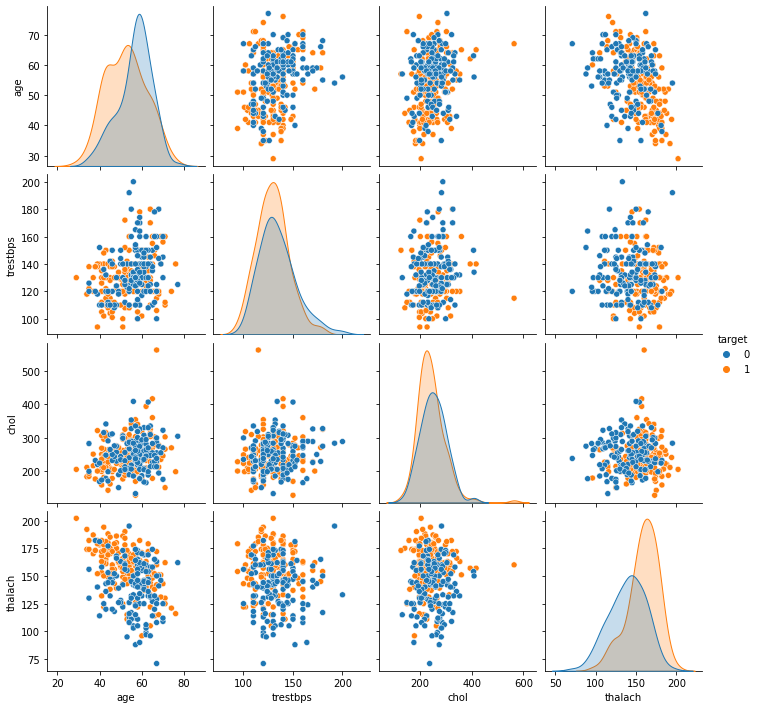

In [8]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot:>

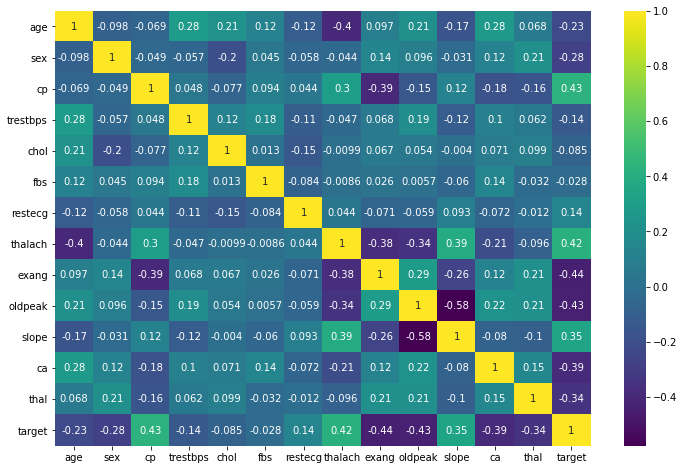

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [10]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


#PCA
scaler = StandardScaler()

#Fit PCA values to 2
pca = PCA(n_components=2).fit(X)
x_pca = pca.transform(X)

#Regular train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#PCA train test
train_features, test_features, train_targets, test_targets = train_test_split(x_pca, y, test_size=0.2)

In [12]:
#Transform the values X and Y
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

In [13]:
'''
 Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. 
 We could use LogisticRegressionCV OR LogisticRegression and GridSearchCV. 
'''
from sklearn.linear_model import LogisticRegressionCV 

In [14]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train);

log_model_pca = LogisticRegressionCV()
log_model_pca.fit(train_features, train_targets);

In [15]:
# Model Performance
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [16]:
#Norm Log
y_pred = log_model.predict(scaled_X_test)

#PCA log
y_pred_pca = log_model_pca.predict(test_features)

In [17]:
confusion_matrix(y_test,y_pred)

array([[22,  9],
       [ 2, 28]], dtype=int64)

In [18]:
confusion_matrix(test_targets,y_pred_pca)

array([[17, 15],
       [ 6, 23]], dtype=int64)

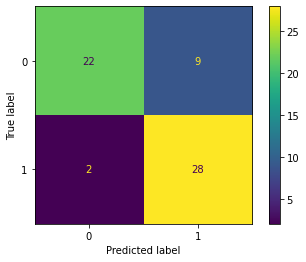

In [19]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [20]:
#classifcation report for regular logistic regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [21]:
#Classification for PCA
print(classification_report(test_targets, y_pred_pca))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        32
           1       0.61      0.79      0.69        29

    accuracy                           0.66        61
   macro avg       0.67      0.66      0.65        61
weighted avg       0.68      0.66      0.65        61



In [22]:
# Model Comparisons - Naive Bayes, LogisticRegression, LogisticRegressionCV, SVC, LinearSVC

In [23]:
#Function to normalize for Naive Bayes (need positive values)
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [24]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

mnb_pca = MultinomialNB()
mnb_pca.fit(NormalizeData(scaled_train_features), NormalizeData(train_targets))

MultinomialNB()

In [25]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(scaled_X_train,y_train)

nb_pca = GaussianNB()
nb_pca.fit(scaled_train_features,train_targets)

GaussianNB()

In [26]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(scaled_X_train,y_train)

log_model_pca = LogisticRegression(max_iter = 1000)
log_model_pca.fit(scaled_train_features, train_targets)

LogisticRegression(max_iter=1000)

In [27]:
# LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV()
logCV.fit(scaled_X_train,y_train);

logCV_pca = LogisticRegressionCV()
logCV_pca.fit(scaled_train_features,train_targets);

In [28]:
# LinearSVC
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()
linearsvc.fit(scaled_X_train,y_train)

linearsvc_pca = LinearSVC()
linearsvc_pca.fit(scaled_train_features,train_targets)

LinearSVC()

In [29]:
# SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(scaled_X_train,y_train)

svc_pca = SVC()
svc_pca.fit(train_features,train_targets)

SVC()

In [30]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(scaled_X_train,y_train)

decisiontree_pca = DecisionTreeClassifier()
decisiontree_pca.fit(scaled_train_features,train_targets)

DecisionTreeClassifier()

Text(0.5, 0, 'K Value')

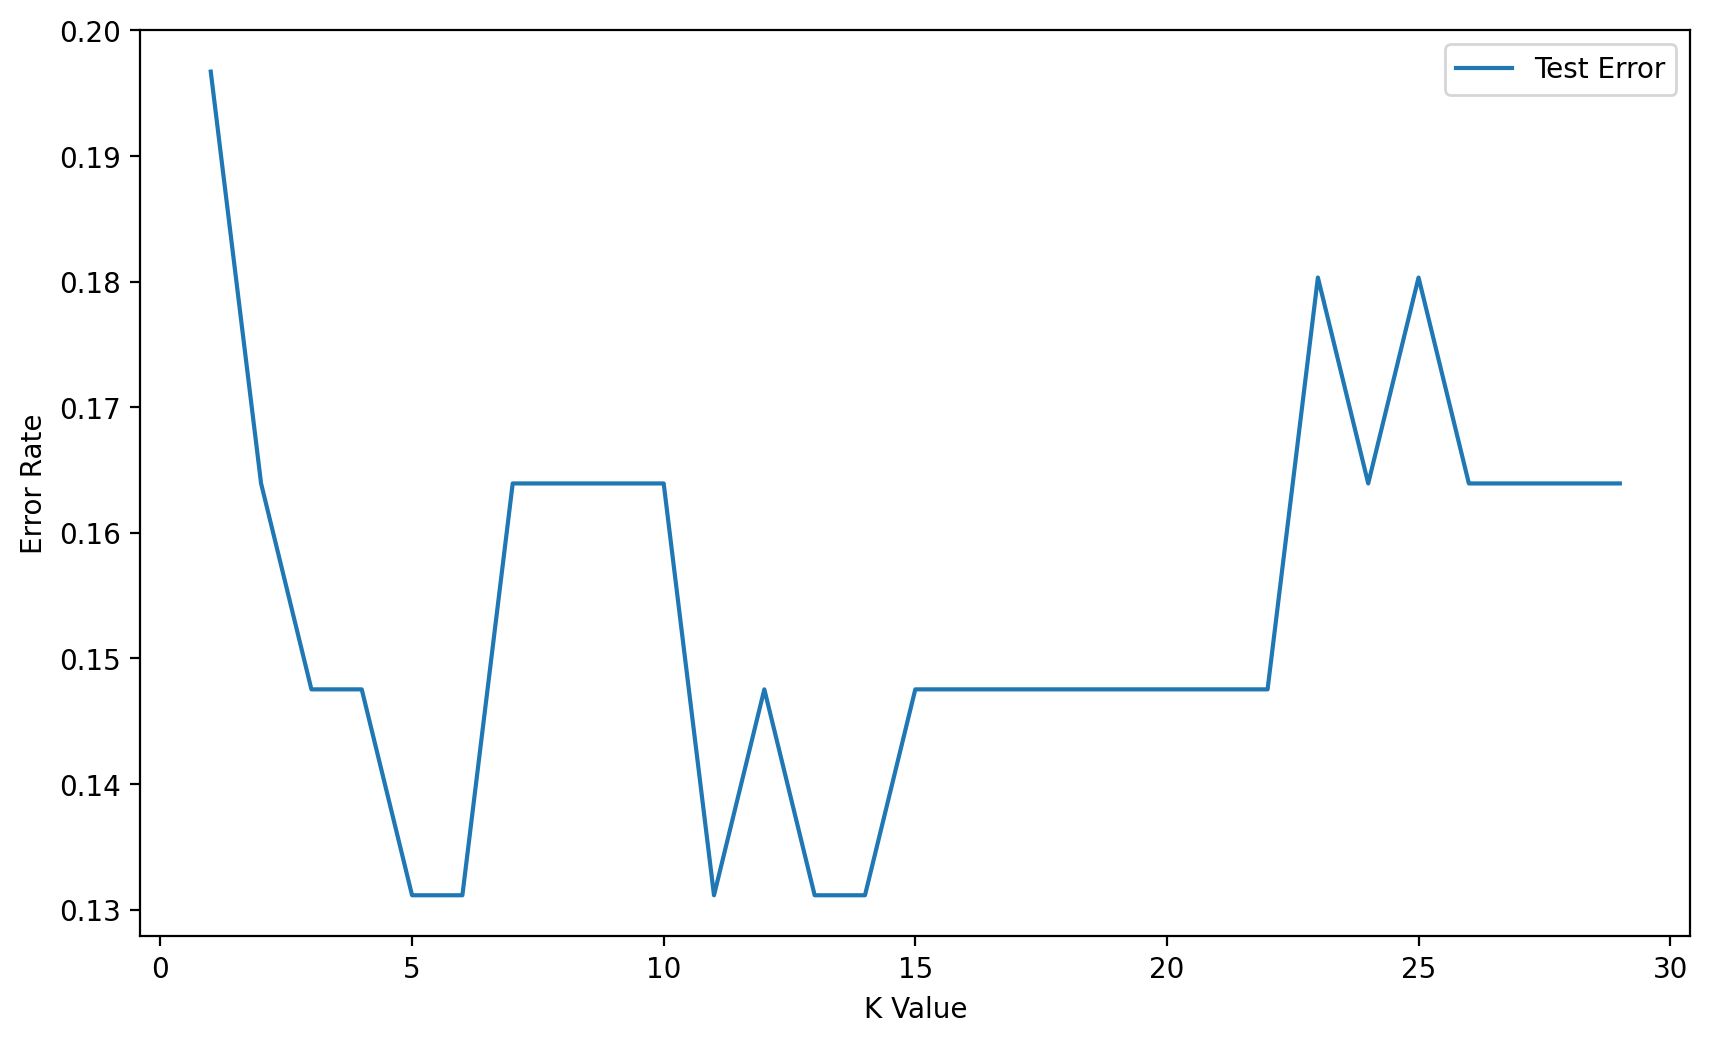

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [32]:
y_pred_pca
train_targets

160    1
251    0
286    0
235    0
124    1
      ..
62     1
111    1
185    0
41     1
231    0
Name: target, Length: 242, dtype: int64

Text(0.5, 0, 'K Value')

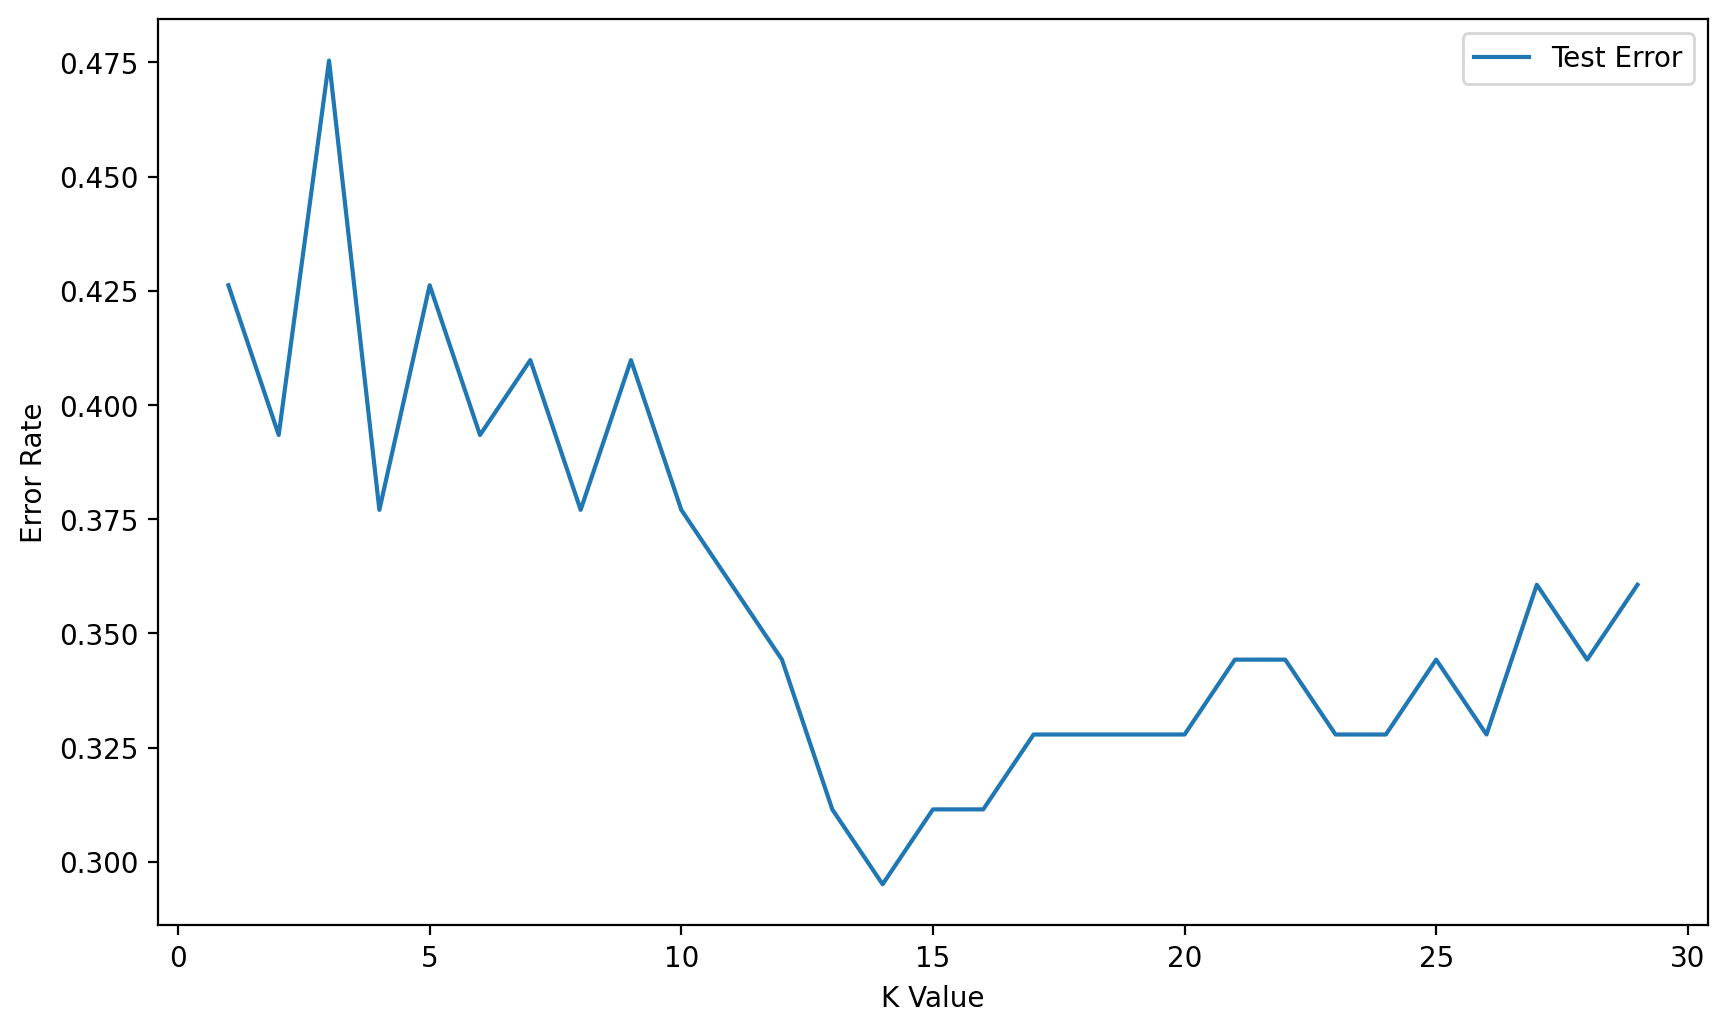

In [33]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_features,train_targets) 
   
    y_pred_test = knn_model.predict(test_features)
    
    test_error = 1 - accuracy_score(test_targets,y_pred_test)
    test_error_rates.append(test_error)
    
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)

knn_model_pca = KNeighborsClassifier(n_neighbors=3)
knn_model_pca.fit(scaled_train_features,train_targets)

KNeighborsClassifier(n_neighbors=3)

In [35]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [36]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,scaled_X_test,y_test)

In [37]:
def report_pca(model):
    preds = model.predict(test_features)
    print(classification_report(test_targets,preds))
    plot_confusion_matrix(model,train_features,train_targets)

MultinomialNB MODEL
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.87      0.81        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



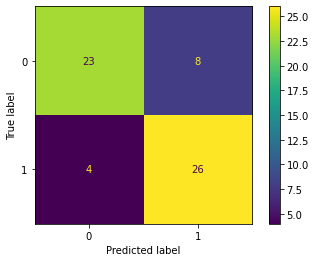

In [38]:
print("MultinomialNB MODEL")
report(mnb)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        32
           1       0.47      0.48      0.47        29

    accuracy                           0.49        61
   macro avg       0.49      0.49      0.49        61
weighted avg       0.49      0.49      0.49        61



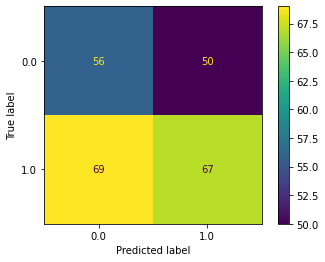

In [39]:
report_pca(mnb_pca)

GuassianNB MODEL
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



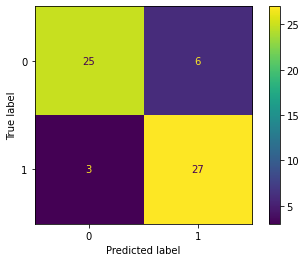

In [40]:
print("GuassianNB MODEL")
report(nb)

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        32
           1       0.53      0.72      0.61        29

    accuracy                           0.56        61
   macro avg       0.57      0.57      0.55        61
weighted avg       0.57      0.56      0.55        61



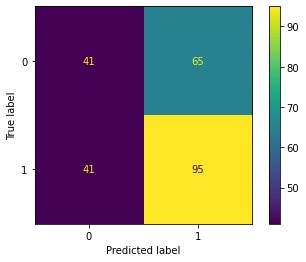

In [41]:
report_pca(nb_pca)

LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



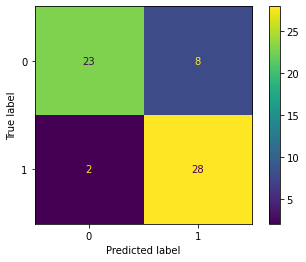

In [42]:
print("LogisticRegression")
report(log_model)

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        32
           1       0.59      0.69      0.63        29

    accuracy                           0.62        61
   macro avg       0.63      0.63      0.62        61
weighted avg       0.63      0.62      0.62        61



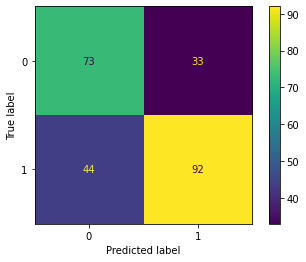

In [43]:
report_pca(log_model_pca)

LogisticRegressionCV
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



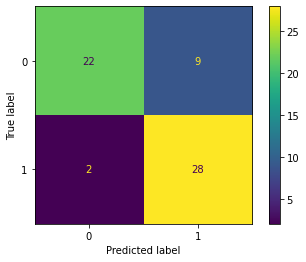

In [44]:
print("LogisticRegressionCV")
report(logCV)

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        32
           1       0.59      0.69      0.63        29

    accuracy                           0.62        61
   macro avg       0.63      0.63      0.62        61
weighted avg       0.63      0.62      0.62        61



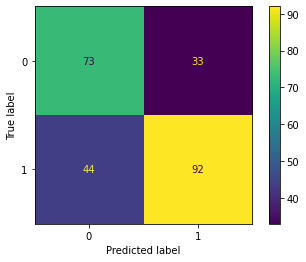

In [45]:
report_pca(logCV_pca)

LinearSVC
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



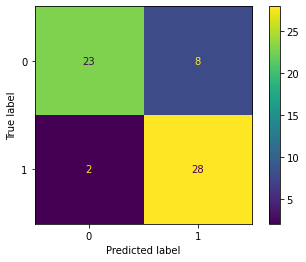

In [46]:
print("LinearSVC")
report(linearsvc)

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        32
           1       0.61      0.69      0.65        29

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



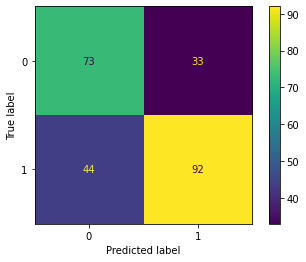

In [47]:
report_pca(linearsvc_pca)

Support Vector Machine
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



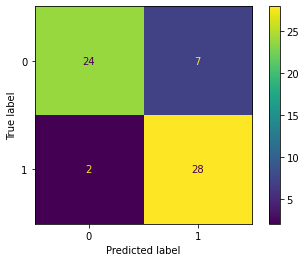

In [48]:
print("Support Vector Machine")
report(svc)

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.59      0.79      0.68        29

    accuracy                           0.64        61
   macro avg       0.66      0.65      0.63        61
weighted avg       0.66      0.64      0.63        61



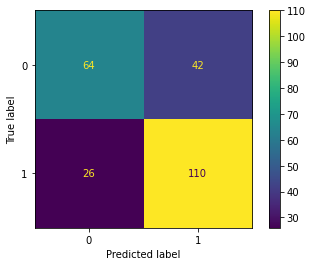

In [49]:
report_pca(svc_pca)

DECISION TREE MODEL
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.79      0.87      0.83        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



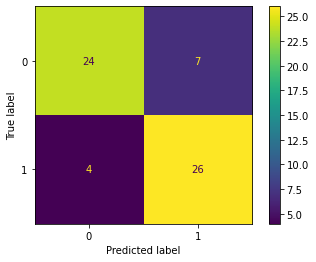

In [50]:
print("DECISION TREE MODEL")
report(decisiontree)

              precision    recall  f1-score   support

           0       0.64      0.28      0.39        32
           1       0.51      0.83      0.63        29

    accuracy                           0.54        61
   macro avg       0.58      0.55      0.51        61
weighted avg       0.58      0.54      0.51        61



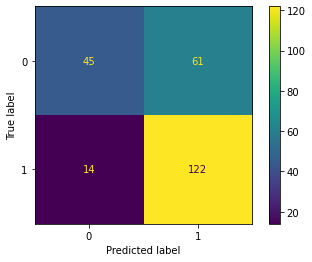

In [51]:
report_pca(decisiontree_pca)

KNN MODEL
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



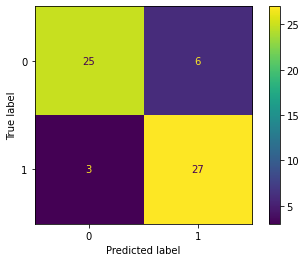

In [52]:
print("KNN MODEL")
report(knn_model)

              precision    recall  f1-score   support

           0       0.75      0.28      0.41        32
           1       0.53      0.90      0.67        29

    accuracy                           0.57        61
   macro avg       0.64      0.59      0.54        61
weighted avg       0.65      0.57      0.53        61



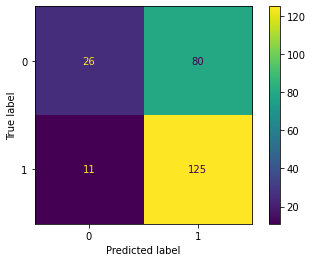

In [53]:
report_pca(knn_model_pca)